# Test the fuck out of Customized SHAP code

In [1]:
import argparse
import os
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc
from torch.utils.data import DataLoader
from plotter import TensorboardPlotter
from dataset import AdversarialDataset
from model import *

In [2]:
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device : ", device)

# Load model
model = AdversarialMTL(hidden_unit=128)
model.to(device)
model.load_state_dict(torch.load('./model/ADMTL/smote.pth', map_location=device))
print("Model loaded")

Device :  cpu
Model loaded


In [3]:
data = AdversarialDataset(mode='test')
print("Dataset created")

print(type(data))
data_feature = data.features
print(type(data))
data_feature = torch.from_numpy(data_feature).float().to(device)
print(type(data_feature))
print(data_feature.shape)
data_feature.to(device)

Dataset created
<class 'dataset.AdversarialDataset'>
<class 'dataset.AdversarialDataset'>
<class 'torch.Tensor'>
torch.Size([918, 15])


tensor([[ 1.0000,  0.4639, -0.1257,  ..., -0.3715, -0.1687, -0.0067],
        [ 0.0000,  0.6506, -0.1257,  ..., -0.9575, -1.1784, -0.0067],
        [ 1.0000, -0.4072, -0.1257,  ...,  1.5628,  1.6785, -0.0067],
        ...,
        [ 0.0000, -0.5939,  0.7561,  ..., -0.4596, -0.1112, -0.7775],
        [ 1.0000,  0.0283, -0.1257,  ..., -0.3983, -0.5463, -0.0067],
        [ 0.0000, -0.4072,  0.2288,  ...,  2.6314, -0.0619,  0.4644]])

In [4]:
out1, out2, ad, _ = model(data_feature)
outputs = torch.cat((out1, out2), dim=1)
outputs.to(device)

tensor([[8.2063e-05, 1.5384e-06],
        [1.0187e-10, 1.1542e-07],
        [7.6478e-05, 7.8247e-05],
        ...,
        [9.9802e-01, 1.1005e-03],
        [6.2869e-05, 4.2514e-07],
        [3.7506e-03, 3.9044e-02]], grad_fn=<CatBackward0>)

In [5]:
print(ad.shape)
outputs_ad = torch.cat((out1,out2,ad),dim=1)
print(outputs_ad.shape)

torch.Size([918, 3])
torch.Size([918, 5])


In [6]:
out1.device

device(type='cpu')

In [7]:
outputs.device

device(type='cpu')

In [8]:
import SHAP

In [9]:

explainer = SHAP.DeepExplainer(model, data_feature, 'ADMTL')

In [10]:
shape_values = explainer.shap_values(data_feature)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [11]:
print(len(shape_values))

5


In [12]:
print(shape_values[0].shape)

(918, 15)


In [13]:
print(shape_values[1].shape)

(918, 15)


In [14]:
# '진단시점나이'를 age 로 변환
feature_names = data.feature_names

for name in feature_names:
    if name == '진단시점나이':
        feature_names[feature_names.index(name)] = 'age'
print(feature_names)

['Gender', 'age', 'CMV IgM[Serum]', 'CMV IgG[Serum]', 'HSV IgM[Serum]', 'VZV IgM[Serum]', 'VZV IgG[Serum]', 'WBC COUNT[Whole blood]', 'Lymphocyte(#)[Whole blood]', 'Lymphocyte(%)[Whole blood]', 'Monocyte(#)[Whole blood]', 'Monocyte(%)[Whole blood]', 'Neutrophil(#)[Whole blood]', 'Neutrophil(%)[Whole blood]', 'ESR[Whole blood]']


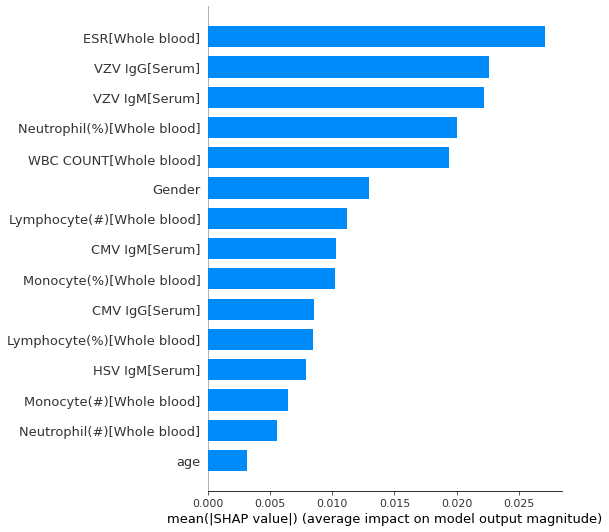

In [15]:
SHAP.summary_plot(shape_values[0], data_feature, plot_type="bar", feature_names=feature_names)

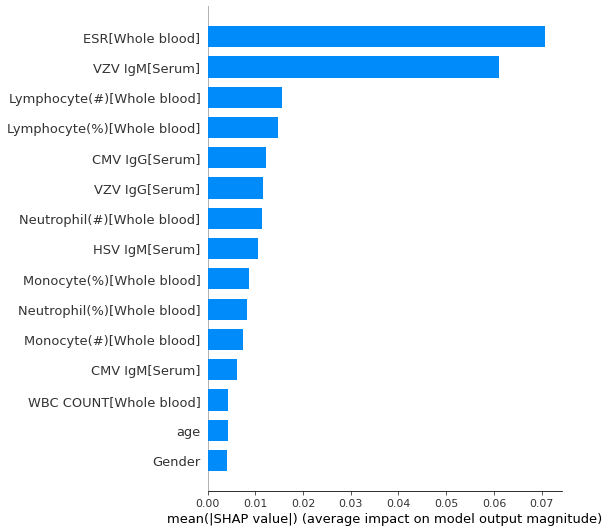

In [16]:
SHAP.summary_plot(shape_values[1], data_feature, plot_type="bar", feature_names=feature_names)

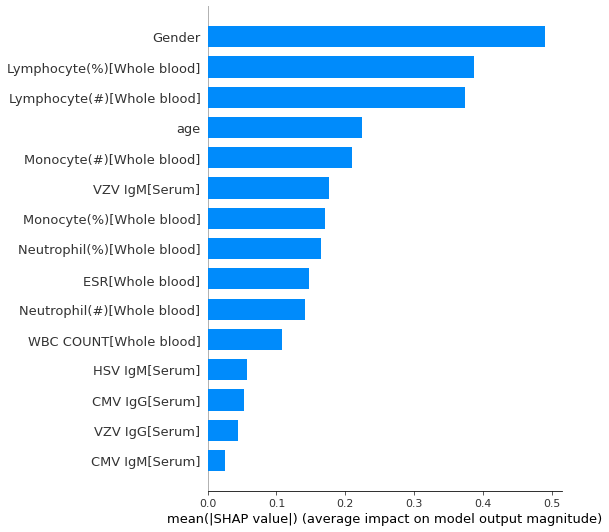

In [17]:
SHAP.summary_plot(shape_values[2], data_feature, plot_type="bar", feature_names=feature_names)

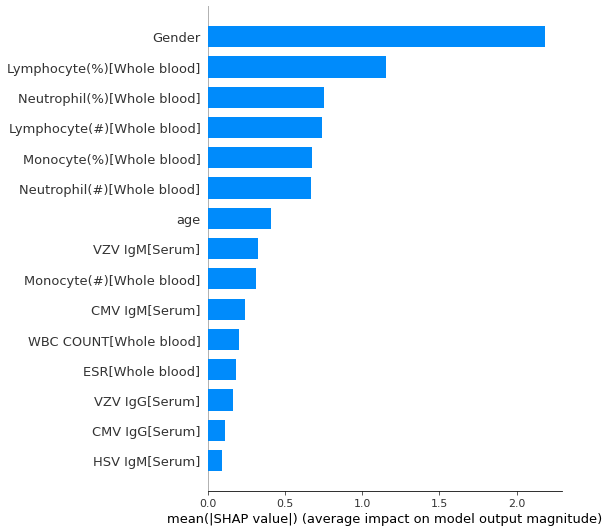

In [18]:
SHAP.summary_plot(shape_values[3], data_feature, plot_type="bar", feature_names=feature_names)

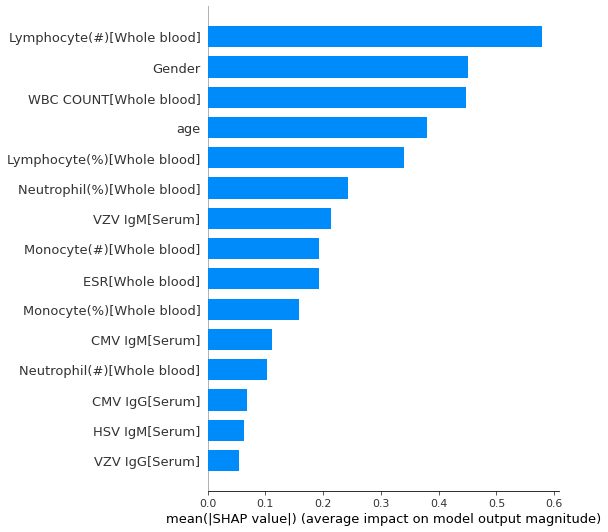

In [19]:
SHAP.summary_plot(shape_values[4], data_feature, plot_type="bar", feature_names=feature_names)